In [1]:
!pip install xeno-canto

In [2]:
# Download only the metadata
import json

!xeno-canto -m grp:"bats" q:"A"

# Uncomment the next line to get all data (WARNING 10 GiB)
# !xeno-canto -dl grp:"bats" q:"A"

dir = "dataset/metadata/grp_batsq_A"

with open(dir+"/page1.json", 'r') as file:
    data = json.load(file)
    print("API message:", data["message"])
    print("Number of recordings:", data["numRecordings"])
    print("Number of pages:", data["numPages"])

Retrieving metadata...
Metadata retrieval complete.
API message: Xeno-canto API v2 will be phased out on October 10, 2025. Visit https://xeno-canto.org/explore/api for API v3 documentation.
Number of recordings: 1171
Number of pages: 3


In [3]:
import os
import json
import pandas as pd

# Convert metadata into frames
frames = []
for entry in os.scandir(dir):
    if entry.is_file():
        with open(entry, 'r') as file:
            data = json.load(file)
            df = pd.DataFrame(data['recordings'])
            frames.append(df)

all_data = pd.concat(frames)

# Print some metadata
print (all_data.columns.values.tolist())


# all_data.head()

# print(all_data)


['id', 'gen', 'sp', 'ssp', 'group', 'en', 'rec', 'cnt', 'loc', 'lat', 'lng', 'alt', 'type', 'sex', 'stage', 'method', 'url', 'file', 'file-name', 'sono', 'osci', 'lic', 'q', 'length', 'time', 'date', 'uploaded', 'also', 'rmk', 'bird-seen', 'animal-seen', 'playback-used', 'temp', 'regnr', 'auto', 'dvc', 'mic', 'smp']


In [89]:
def to_seconds(x):
    mins, secs = map(float, x.split(':'))
    return mins * 60 + secs

all_data['length'] = all_data['length'].apply(to_seconds)
all_data = all_data.rename(columns={"gen": "genus", "en": "english_name", "cnt": "country", "type": "call_type", "length": "audio_length", "dvc": "device", "mic": "microphone"})
data = all_data[["id", "genus", "english_name", "country", "call_type", "sex", "audio_length", "device", "microphone"]]
data.head()


,id,genus,english_name,country,call_type,sex,audio_length,device,microphone
0,920292,Eptesicus,Eurasian Serotine,Netherlands,"echolocation, feeding buzz",,26.0,Echo Meter Touch 2,
1,914886,Eptesicus,Eurasian Serotine,Netherlands,"echolocation, social call",,14.0,Echo Meter Touch 2,
2,913356,Eptesicus,Eurasian Serotine,Netherlands,"echolocation, feeding buzz",,14.0,Echo Meter Touch 2,
3,913125,Eptesicus,Eurasian Serotine,Germany,"echolocation, feeding buzz",,29.0,Gigaset GX4,Echo Meter Touch 2 Pro
4,913114,Eptesicus,Eurasian Serotine,Germany,"echolocation, feeding buzz",,15.0,Gigaset GX4,Echo Meter Touch 2 Pro


Text(0.5, 0, 'Audio duration (s)')

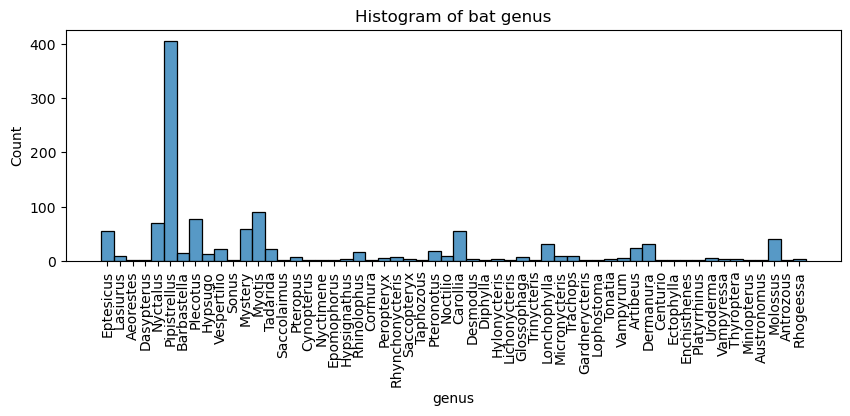

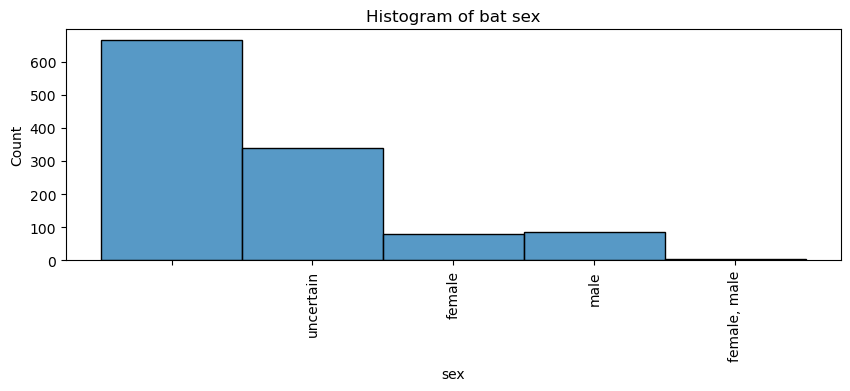

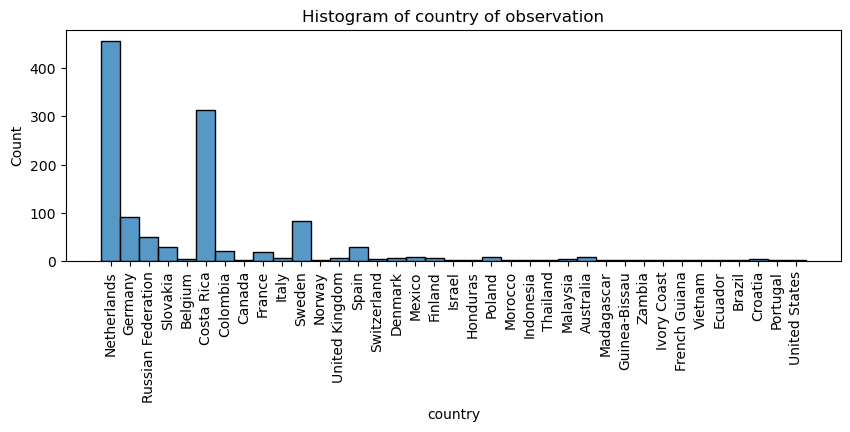

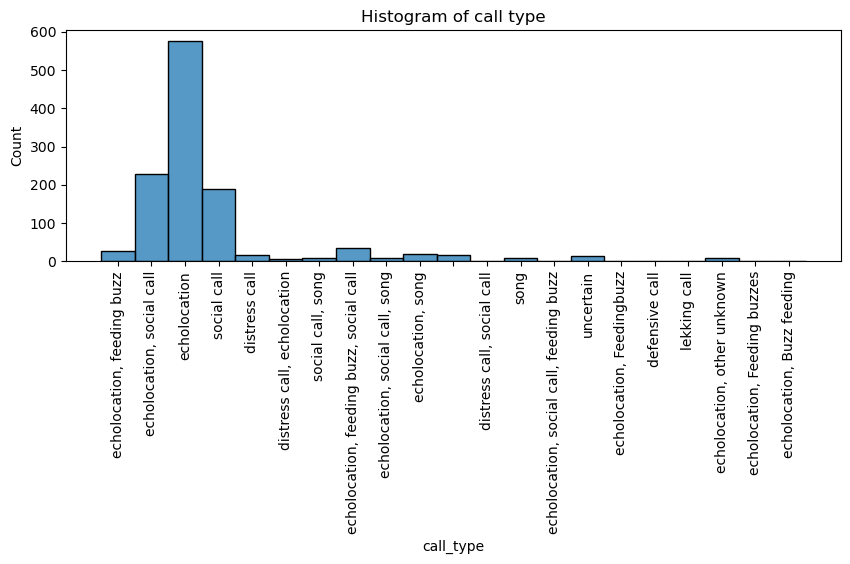

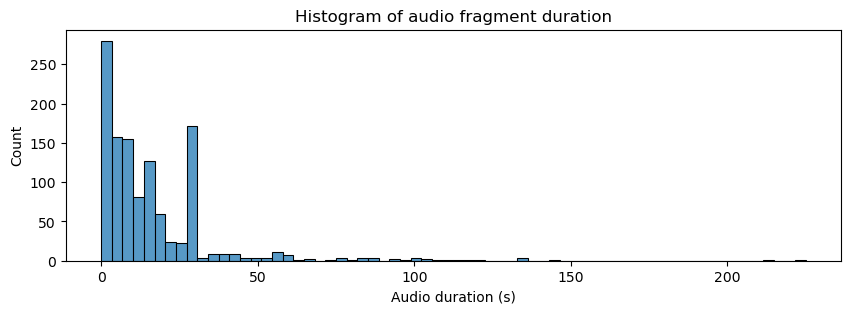

In [90]:
import matplotlib.pyplot as plt
import seaborn

fig, ax = plt.subplots(figsize=(10,3))
ax.tick_params(axis='x', labelrotation=90)
ax.set_title("Histogram of bat genus")
seaborn.histplot(x="genus", data=data, ax=ax)

fig, ax = plt.subplots(figsize=(10,3))
ax.tick_params(axis='x', labelrotation=90)
ax.set_title("Histogram of bat sex")
seaborn.histplot(x="sex", data=data, ax=ax)

fig, ax = plt.subplots(figsize=(10,3))
ax.tick_params(axis='x', labelrotation=90)
ax.set_title("Histogram of country of observation")
seaborn.histplot(x="country", data=data, ax=ax)

fig, ax = plt.subplots(figsize=(10,3))
ax.tick_params(axis='x', labelrotation=90)
ax.set_title("Histogram of call type")
seaborn.histplot(x="call_type", data=data, ax=ax)

fig, ax = plt.subplots(figsize=(10,3))
ax = seaborn.histplot(x="audio_length", data=data)
ax.set_title("Histogram of audio fragment duration")
ax.set_xlabel("Audio duration (s)")